In [1]:
# make sure you have two folders
# data
# notebooks

In [2]:
import os

os.getcwd()

'/Users/shaq/private/tu_berlin/notebooks'

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# for google colab users
# you need to mount the drive

# from google.colab import drive
# drive.mount('/content/drive')

# create three folders - data, 
# you need to go into the directory where you have created the notebooks folder
# %cd /content/drive/MyDrive/file_path


### EDA

In [3]:
# Load the data

users_data = pd.read_pickle("../data/users_data_final.pkl")

In [6]:
# preview the data

users_data.head()

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
0,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,3.0,2143.0,58,management,married,tertiary,False,True,False,None,261,1,-1,0,None,False,1998-08-23,mobile
1,bb92765a-08de-4963-b432-496524b39157,NaN,NaN,44,technician,single,secondary,False,True,False,None,151,1,-1,0,None,False,2008-07-15,desktop
2,573de577-49ef-42b9-83da-d3cfb817b5c1,2.0,2.0,33,entrepreneur,married,secondary,False,True,True,None,76,1,-1,0,None,False,2002-06-04,mobile
3,d6b66b9d-7c8f-4257-a682-e136f640b7e3,NaN,NaN,47,blue-collar,married,None,False,True,False,None,92,1,-1,0,None,False,1995-06-29,tablet
4,fade0b20-7594-4d9a-84cd-c02f79b1b526,1.0,1.0,33,None,single,None,False,False,False,None,198,1,-1,0,None,False,1995-08-01,mobile


In [7]:
# look at the shape of the data (rows, columns)

users_data.shape

(45209, 19)

In [8]:
# look at number of unique users in the data

len(np.unique(users_data.user_id))

# as expected, this is same as the number of rows in the data

45209

In [9]:
# look at the structure of the data

users_data.info()

# how many numerical data types do we have? how many non numerical data types?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45209 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              45209 non-null  object        
 1   number_transactions  35210 non-null  float64       
 2   total_amount_usd     35210 non-null  float64       
 3   age                  45209 non-null  int64         
 4   job                  44921 non-null  object        
 5   marital              45209 non-null  object        
 6   education            43352 non-null  object        
 7   default              45209 non-null  bool          
 8   housing              45209 non-null  bool          
 9   loan                 45209 non-null  bool          
 10  contact              32191 non-null  object        
 11  duration             45209 non-null  int64         
 12  campaign             45209 non-null  int64         
 13  pdays                45209 non-

In [10]:
# generate summary statistics for numerical data only
# gives the count, mean, std, min, percentiles all numerical data

users_data.describe()

,number_transactions,total_amount_usd,age,duration,campaign,pdays,previous
count,35210.000000,35210.000000,45209.000000,45209.000000,45209.000000,45209.000000,45209.000000
mean,3.977052,1369.417751,40.935853,258.153067,2.763897,40.199651,0.580349
std,3.814329,3063.412688,10.618653,257.525446,3.098076,100.130586,2.303489
min,1.000000,-8019.000000,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,2.000000,73.000000,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,3.000000,451.000000,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,4.000000,1438.000000,48.000000,319.000000,3.000000,-1.000000,0.000000
max,20.000000,102127.000000,95.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
# generate summary statistics for all data

users_data.describe(datetime_is_numeric = True, include = 'all')

,user_id,number_transactions,total_amount_usd,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,term_deposit,date_joined,device
count,45209,35210.000000,35210.000000,45209.000000,44921,45209,43352,45209,45209,45209,32191,45209.000000,45209.000000,45209.000000,45209.000000,8252,45209,45179,45115
unique,45209,NaN,NaN,NaN,11,3,3,2,2,2,2,NaN,NaN,NaN,NaN,3,2,NaN,3
top,9231c446-cb16-4b2b-a7f7-ddfc8b25aaf6,NaN,NaN,NaN,blue-collar,married,secondary,False,True,False,cellular,NaN,NaN,NaN,NaN,failure,False,NaN,mobile
freq,1,NaN,NaN,NaN,9731,27212,23202,44394,25128,37965,29285,NaN,NaN,NaN,NaN,4901,39920,NaN,27504
mean,NaN,3.977052,1369.417751,40.935853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.153067,2.763897,40.199651,0.580349,NaN,NaN,1999-06-14 21:54:38.558622336,NaN
min,NaN,1.000000,-8019.000000,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN,1988-01-01 00:00:00,NaN
25%,NaN,2.000000,73.000000,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN,1993-09-18 00:00:00,NaN
50%,NaN,3.000000,451.000000,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN,1999-06-11 00:00:00,NaN
75%,NaN,4.000000,1438.000000,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN,2005-03-18 00:00:00,NaN
max,NaN,20.000000,102127.000000,95.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4918.000000,63.000000,871.000000,275.000000,NaN,NaN,2010-11-30 00:00:00,NaN


In [12]:
# summarise the data using varaince and std

users_data.std()

# which variables have low variance, close to 0. Which variable has the lowest std?

number_transactions                        3.814329
total_amount_usd                        3063.412688
age                                       10.618653
default                                    0.133052
housing                                     0.49688
loan                                       0.366827
duration                                 257.525446
campaign                                   3.098076
pdays                                    100.130586
previous                                   2.303489
term_deposit                               0.321412
date_joined            2420 days 10:04:20.364896480
dtype: object

In [13]:
# look at the distribution of default

users_data.default.value_counts(normalize = True)

# 98% of customers default. This feature is not adding any additional value, so we may want to remove when we do our feature engineering.

False    0.981973
True     0.018027
Name: default, dtype: float64

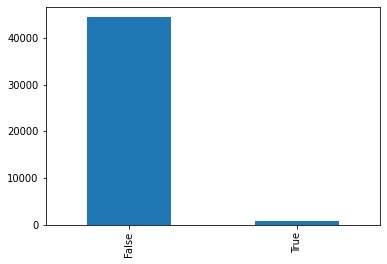

In [14]:
# you can also visualise the data, which shows that the data is predominantly false

users_data.default.value_counts().plot(kind='bar');

In [35]:
# check how many categories they have
# OPTION 1 

def identify_number_categories(df):
    """
    This definition can be used to identify the number of categories of every categorical feature 
    
    @param df DataFrame 
    
    @return a DataFrame with the categorical features and number of categories"""

    categorical_columns = list(df.select_dtypes(['object']).columns)

    cat_df = []

    for c in categorical_columns:
        cat_df.append({"categorical_feature": c,
                       "number_categories": len(df[c].unique())
                    })
        
    return pd.DataFrame(cat_df).sort_values(by = "number_categories", ascending = False)

In [36]:
identify_number_categories(users_data)

# we may want to drop user_id and categories that have more than a certain threshold of categories

,categorical_feature,number_categories
0,user_id,45209
1,job,12
3,education,4
5,poutcome,4
6,device,4
2,marital,3
4,contact,3


In [37]:
# OPTION 2- FOR IDENTIFYING HOW MANY CATEGORIES THE FEATURES WITH DATA TYPES OBJECTS HAVE
# CREDIT TO TERGE

users_data.select_dtypes("object").apply(pd.Series.nunique).sort_values(ascending=False)

# however this method does not count the NAs. You can use either - 
# it is just important we drop or identify features that have an INSANE NUMBER of categories


user_id      45209
job             11
marital          3
education        3
poutcome         3
device           3
contact          2
dtype: int64

In [30]:
# convert the output to a DataFrame if you want to tidy up the output

summary_df = pd.DataFrame(users_data.select_dtypes("object").apply(pd.Series.nunique).sort_values(ascending=False)).reset_index()
summary_df.rename(columns = {"index": "categorical_feature", 0 : "number_features"})
                                                                                                                                

,categorical_feature,number_features
0,user_id,45209
1,job,11
2,marital,3
3,education,3
4,poutcome,3
5,device,3
6,contact,2


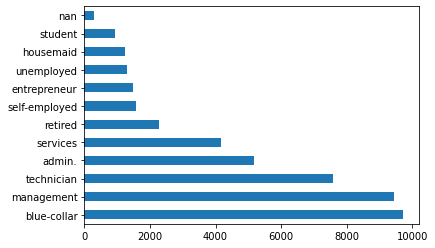

In [17]:
# there are several ways we can visualise numerical data
# for non numerical data, bar charts are the safest best

# select a non numerical variable of you choice and plot a bar chart
var = 'job'
users_data[var].value_counts(dropna = False).plot(kind='barh');

# we can see missing data!!! we will also handle this when we do our feature engineering.

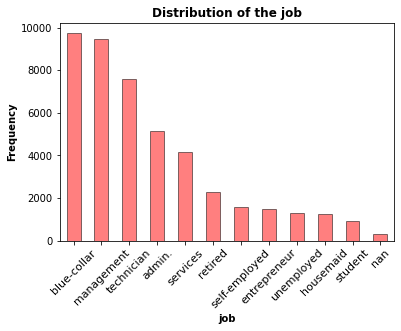

In [18]:
# We can also add some more formatting to the bar charts, e.g. colour, rotating ticks

users_data[var].value_counts(dropna = False).plot(kind='bar', color='red', alpha=0.5, edgecolor='black') # plot the bar chart
plt.title(f'Distribution of the {var}', size=12, weight='bold') # add a title for the graph
plt.xticks(rotation=45, size=11) # adjust the xticks
plt.xlabel(var, size=10, weight='bold') # add the x-axis label name
plt.ylabel('Frequency', size=10, weight='bold') # add the y-axis label name
plt.show();

# We can see that mobile is the most popular device and the data has some missing values

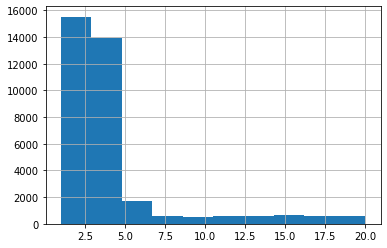

In [19]:
# visualising numerical data -- histograms

users_data.number_transactions.hist();

# we may apply logarithms to this feature to scale it

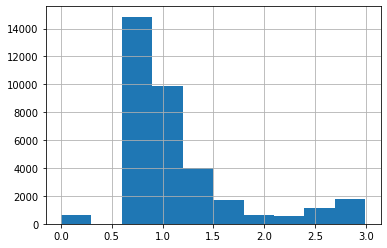

In [20]:
# applying logarithms normalises the data
# in our feature engineering process we may want to take some fea

np.log(users_data.number_transactions).hist();

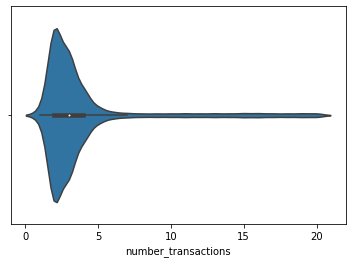

In [21]:
# we can visualise the data with  violin plot

var = "number_transactions"
sns.violinplot(users_data[var]);

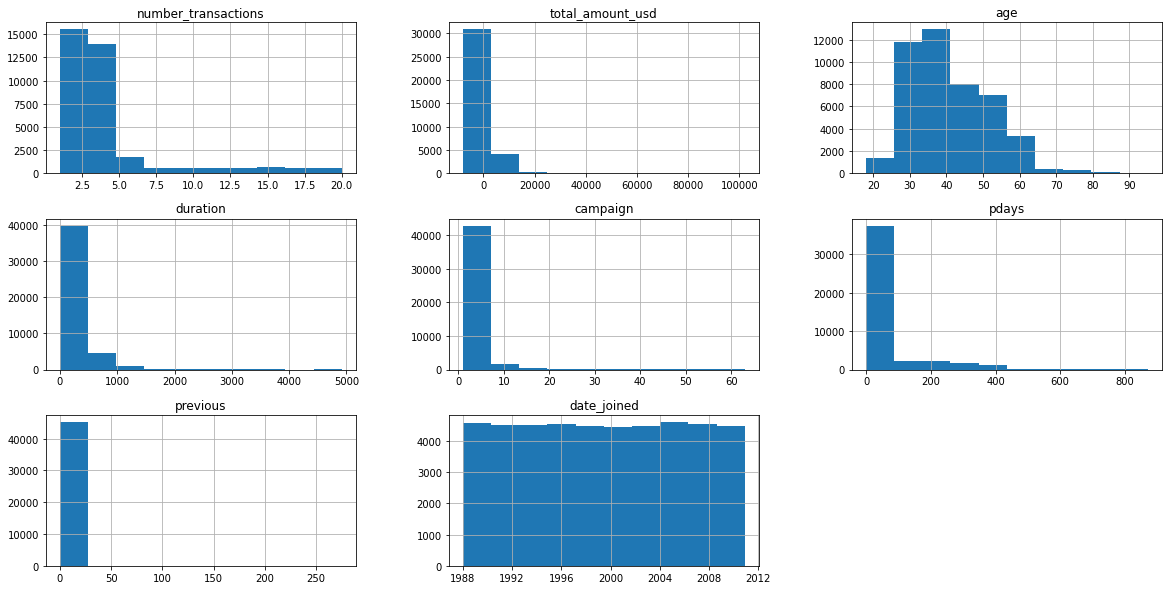

In [22]:
# understanding the distribution of all the variables

users_data.hist(figsize=(20,10));

# which variables are skewed? date_joined should not be part of this
# we could drop and plot again

In [23]:
# identifying correlations between diffent features

# correlation between all numerical and boolean variables

corr_matrix = users_data.corr()

corr_matrix

,number_transactions,total_amount_usd,age,default,housing,loan,duration,campaign,pdays,previous,term_deposit
number_transactions,1.000000,-0.163409,-0.008813,0.138838,0.030429,0.075319,-0.017220,0.026431,-0.030751,-0.023046,-0.053390
total_amount_usd,-0.163409,1.000000,0.095839,-0.065390,-0.066857,-0.084526,0.022586,-0.017274,0.006435,0.016952,0.050785
age,-0.008813,0.095839,1.000000,-0.017875,-0.185552,-0.015641,-0.004645,0.004767,-0.023745,0.001297,0.025168
default,0.138838,-0.065390,-0.017875,1.000000,-0.006020,0.077232,-0.010017,0.016819,-0.029982,-0.018331,-0.022421
housing,0.030429,-0.066857,-0.185552,-0.006020,1.000000,0.041341,0.005041,-0.023583,0.124197,0.037087,-0.139161
loan,0.075319,-0.084526,-0.015641,0.077232,0.041341,1.000000,-0.012395,0.009972,-0.022762,-0.011048,-0.068193
duration,-0.017220,0.022586,-0.004645,-0.010017,0.005041,-0.012395,1.000000,-0.084551,-0.001549,0.001213,0.394549
campaign,0.026431,-0.017274,0.004767,0.016819,-0.023583,0.009972,-0.084551,1.000000,-0.088636,-0.032860,-0.073179
pdays,-0.030751,0.006435,-0.023745,-0.029982,0.124197,-0.022762,-0.001549,-0.088636,1.000000,0.454817,0.103616
previous,-0.023046,0.016952,0.001297,-0.018331,0.037087,-0.011048,0.001213,-0.032860,0.454817,1.000000,0.093232


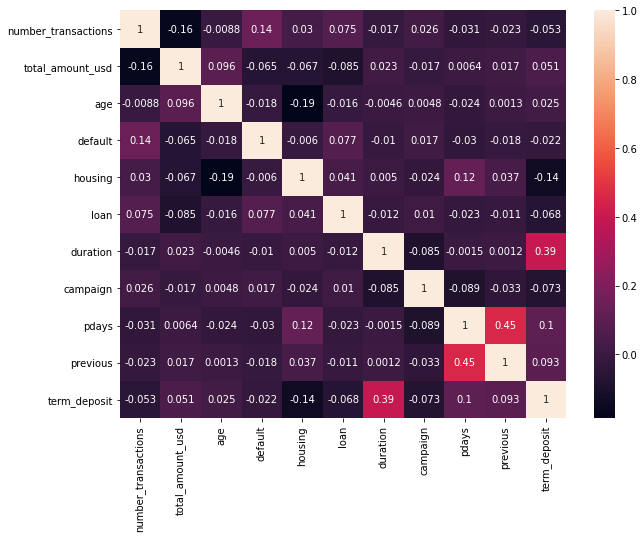

In [24]:
# visualize the relationship with a seaborn heatmap
fig = plt.figure(figsize=(10, 7.5))

sns.heatmap(corr_matrix, annot = True);

# corner at the end has the strongest relationship - previous and pdays

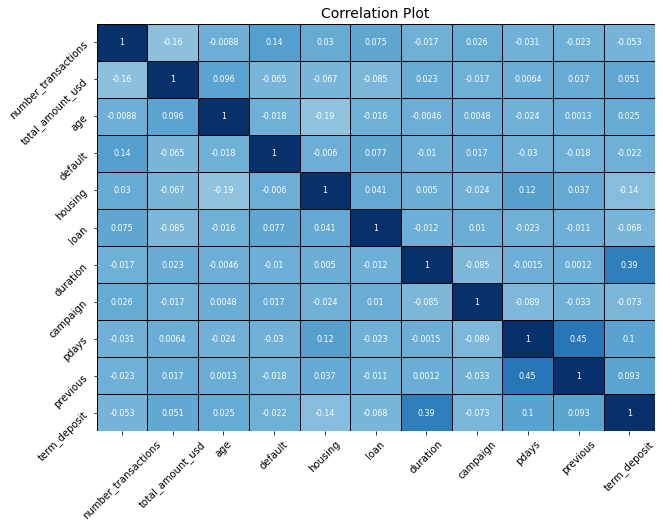

In [25]:
# tidy up the visualization

fig = plt.figure(figsize=(10, 7.5))

sns.heatmap(corr_matrix, 
            cmap="Blues", 
            linewidth=0.75,
            linecolor='black',
            cbar=False,
            # cbar_kws={"orientation": "horizontal"},
            vmin=-1, 
            vmax=1,
            annot=True,
            annot_kws={"size": 8, "color": "white"}
            # center=0
            # yticklabels=False)
           )

plt.tick_params(labelsize=10, rotation=45)
plt.title("Correlation Plot", size=14);

In [26]:
# Exercise: How would you identify highly correlated pairs with code??

In [27]:
def identify_highly_correlated_features(df, correlation_threshold):
    """
    This definition can be used to identify highly correlated features
    
    @param df pandas DataFrame
    @param correlation_threshold int 
    
    @return a DataFrame with highly correlated features 
    """
    
    corr_matrix = df.corr().abs() # calculate the correlation matrix with 
    high_corr_var = np.where(corr_matrix >= correlation_threshold) # identify variables that have correlations above defined threshold
    high_corr_var = [(corr_matrix.index[x], corr_matrix.columns[y], round(corr_matrix.iloc[x, y], 2))
                         for x, y in zip(*high_corr_var) if x != y and x < y] # identify pairs of highly correlated variables
    
    high_corr_var_df = pd.DataFrame(high_corr_var).rename(columns = {0: 'corr_feature',
                                                                     1: 'drop_feature',
                                                                     2: 'correlation_values'})
    if high_corr_var_df.shape == (0, 0):
        high_corr_var_df
    else:
        high_corr_var_df.sort_values(by = 'correlation_values', ascending = False)
    
    return high_corr_var_df

In [28]:
# my code currently errors when it can not return a result

identify_highly_correlated_features(users_data, correlation_threshold = 0.3)

,corr_feature,drop_feature,correlation_values
0,duration,term_deposit,0.39
1,pdays,previous,0.45


### Feature Engineering

In [29]:
# drop user_id as this contains singular values and adds no value
users_data.drop(['user_id'], inplace = True, axis = 1)

In [30]:
# identify missing values

users_data.isnull().sum()

number_transactions     9999
total_amount_usd        9999
age                        0
job                      288
marital                    0
education               1857
default                    0
housing                    0
loan                       0
contact                13018
duration                   0
campaign                   0
pdays                      0
previous                   0
poutcome               36957
term_deposit               0
date_joined               30
device                    94
dtype: int64

In [31]:
# Another way to look at the missing values is the percentage of values that are missing

percent_missing = users_data.isnull().mean() 

percent_missing

number_transactions    0.221173
total_amount_usd       0.221173
age                    0.000000
job                    0.006370
marital                0.000000
education              0.041076
default                0.000000
housing                0.000000
loan                   0.000000
contact                0.287952
duration               0.000000
campaign               0.000000
pdays                  0.000000
previous               0.000000
poutcome               0.817470
term_deposit           0.000000
date_joined            0.000664
device                 0.002079
dtype: float64

In [32]:
def identify_missing_data(df):
    """
    This function is used to identify missing data
    
    @param df pandas DataFrame
    
    @return a DataFrame with the percentage of missing data for every feature and the data types
    """
    
    percent_missing = df.isnull().mean()
    
    missing_value_df = pd.DataFrame(percent_missing).reset_index() # convert to DataFrame
    missing_value_df = missing_value_df.rename(columns = {"index" : "feature",
                                                                0 : "percent_missing"}) # rename columns

    missing_value_df = missing_value_df.sort_values(by = ['percent_missing'], ascending = False) # sort the values
    
    data_types_df = pd.DataFrame(df.dtypes).reset_index().rename(columns = {"index" : "feature",
                                                                0 : "data_type"}) # rename columns
    
    missing_value_df = missing_value_df.merge(data_types_df, on = "feature") # join the dataframe with datatype
    
    missing_value_df.percent_missing = round(missing_value_df.percent_missing*100, 2) # format the percent_missing
    
    return missing_value_df

In [33]:
missing_value_df = identify_missing_data(users_data)
missing_value_df[missing_value_df.percent_missing > 0]

,feature,percent_missing,data_type
0,poutcome,81.75,object
1,contact,28.80,object
2,total_amount_usd,22.12,float64
3,number_transactions,22.12,float64
4,education,4.11,object
5,job,0.64,object
6,device,0.21,object
7,date_joined,0.07,datetime64[ns]


In [34]:
# how many features have missing data?
print("# of features with missing data:", missing_value_df[missing_value_df.percent_missing > 0].shape[0])

# of features with missing data: 8


In [35]:
# Columns with a high percentage of missing values should be dropped.
# This threshold is defined by the Data Scientist, but as a rule of thumb, if a column contains 70 - 80% missing values, you should drop this column

threshold = 80 # define threshold

cols_to_drop = list(missing_value_df[missing_value_df['percent_missing'] > threshold]['feature']) # identify columns to drop

# Print detail

print("# of columns to drop:", missing_value_df[missing_value_df['percent_missing'] > threshold].shape[0])

print(f"Columns with missing values greater that {threshold}%:", cols_to_drop)


# of columns to drop: 1
Columns with missing values greater that 80%: ['poutcome']


In [36]:
# drop columns indentified with a high threshold of missing values

users_data_cleaned = users_data.drop(cols_to_drop, axis = 1)

In [37]:
# check to see if the column has been dropped

missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df.percent_missing > 0]


,feature,percent_missing,data_type
0,contact,28.80,object
1,number_transactions,22.12,float64
2,total_amount_usd,22.12,float64
3,education,4.11,object
4,job,0.64,object
5,device,0.21,object
6,date_joined,0.07,datetime64[ns]


In [38]:
# replace numerical data types with 0 and objects with unknown

users_data_cleaned.device.fillna("Unknown", inplace = True) # replace the missing values in device with Unknown
users_data_cleaned.education.fillna("Unknown", inplace = True) # replace the missing values in education with Unknown
users_data_cleaned.contact.fillna("Unknown", inplace = True) # replace the missing values in contact with Unknown
users_data_cleaned.job.fillna("Unknown", inplace = True) # replace the missing values in job with Unknown


In [39]:
# check to see if the column has been dropped

missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df.percent_missing > 0]


,feature,percent_missing,data_type
0,number_transactions,22.12,float64
1,total_amount_usd,22.12,float64
2,date_joined,0.07,datetime64[ns]


In [40]:
users_data_cleaned['total_amount_usd'].fillna(0, inplace = True)
users_data_cleaned['number_transactions'].fillna(0, inplace = True)

In [41]:
# what do we do about date_joined? 
# let's drop all the rows where date_joined is missing

# remove corrupted data

users_data_cleaned = users_data_cleaned[~users_data_cleaned['date_joined'].isnull()]

In [42]:
missing_value_df = identify_missing_data(users_data_cleaned)
missing_value_df[missing_value_df.percent_missing > 0]


,feature,percent_missing,data_type


In [43]:
# Yay! no more missing data
# Now we need to do something about the non numerical object types
